<a href="https://colab.research.google.com/github/farhanarnob/PhenoGeneRankerArnob/blob/main/PhenoGeneRankerDataProcessGeneCoExpressionWeightMatrix_tr_4_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
# Read gene expression file
gene_expression_raw = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

In [ ]:
# print dataframe shape
gene_expression = gene_expression_raw
print("Dataframe shape:", gene_expression.shape)

Dataframe shape: (49394, 748)


In [ ]:
# show dataframe

gene_expression.head(10)

,Phase,Unnamed: 1,Unnamed: 2,ADNIGO,ADNI2,ADNI2.1,ADNIGO.1,ADNI2.2,ADNI2.3,ADNI2.4,...,ADNIGO.292,ADNI2.443,ADNIGO.293,ADNI2.444,ADNIGO.294,ADNI2.445,ADNI2.446,ADNI2.447,ADNI2.448,Unnamed: 747
0,Visit,NaN,NaN,m48,v03,v03,m48,v03,v03,v06,...,bl,v03,m60,v03,bl,v03,v03,v03,v06,NaN
1,SubjectID,NaN,NaN,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,...,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101,NaN
2,260/280,NaN,NaN,2.05,2.07,2.04,2.03,2.01,2.05,1.95,...,2.05,2.05,1.98,2.09,1.87,2.03,2.11,1.94,2.06,NaN
3,260/230,NaN,NaN,0.55,1.54,2.1,1.52,1.6,1.91,1.47,...,1.9,2.05,1.65,1.56,1.45,1.33,0.27,1.72,1.35,NaN
4,RIN,NaN,NaN,7.7,7.6,7.2,6.8,7.9,7,7.9,...,6.7,6.5,6.3,6.4,6.6,6.8,6.2,5.8,6.7,NaN
5,Affy Plate,NaN,NaN,7,3,6,7,9,4,3,...,8,6,9,3,8,5,3,1,4,NaN
6,YearofCollection,NaN,NaN,2011,2012,2011,2011,2011,2012,2011,...,2011,2012,2011,2012,2011,2012,2011,2011,2012,NaN
7,ProbeSet,LocusLink,Symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11715100_at,LOC8355,HIST1H3G,2.237,2.294,2.14,2.062,2.04,2.439,1.955,...,2.34,2.405,2.349,2.212,2.382,2.497,2.309,2.302,2.661,[HIST1H3G] histone cluster 1 H3g
9,11715101_s_at,LOC8355,HIST1H3G,2.624,2.416,2.322,2.5,2.395,2.309,2.451,...,2.53,2.513,2.754,2.559,2.277,2.466,2.607,2.569,2.679,[HIST1H3G] histone cluster 1 H3g


In [ ]:
gene_expression = gene_expression.loc[:, ~gene_expression.columns.str.contains('^Unnamed')]
gene_expression.columns = gene_expression.iloc[1]

In [ ]:
gene_expression.head(10)

1,SubjectID,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,003_S_2374,036_S_4491,...,082_S_4339,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101
0,Visit,m48,v03,v03,m48,v03,v03,v06,bl,v03,...,v03,bl,v03,m60,v03,bl,v03,v03,v03,v06
1,SubjectID,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,003_S_2374,036_S_4491,...,082_S_4339,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101
2,260/280,2.05,2.07,2.04,2.03,2.01,2.05,1.95,1.99,2.06,...,2.08,2.05,2.05,1.98,2.09,1.87,2.03,2.11,1.94,2.06
3,260/230,0.55,1.54,2.1,1.52,1.6,1.91,1.47,2.07,1.06,...,1.75,1.9,2.05,1.65,1.56,1.45,1.33,0.27,1.72,1.35
4,RIN,7.7,7.6,7.2,6.8,7.9,7,7.9,7.2,5.5,...,6.2,6.7,6.5,6.3,6.4,6.6,6.8,6.2,5.8,6.7
5,Affy Plate,7,3,6,7,9,4,3,8,5,...,3,8,6,9,3,8,5,3,1,4
6,YearofCollection,2011,2012,2011,2011,2011,2012,2011,2011,2012,...,2011,2011,2012,2011,2012,2011,2012,2011,2011,2012
7,ProbeSet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11715100_at,2.237,2.294,2.14,2.062,2.04,2.439,1.955,2.372,2.327,...,2.575,2.34,2.405,2.349,2.212,2.382,2.497,2.309,2.302,2.661
9,11715101_s_at,2.624,2.416,2.322,2.5,2.395,2.309,2.451,2.403,2.738,...,2.841,2.53,2.513,2.754,2.559,2.277,2.466,2.607,2.569,2.679


In [ ]:
gene_expression.drop(gene_expression.index[0:8],0,inplace=True)
gene_expression = gene_expression.reset_index(drop = True)
gene_expression = gene_expression.rename(columns={'SubjectID': 'PROBEID'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# gene_expression = gene_expression
# gene_expression.head(10)

In [ ]:
gene_expression.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile_processed.csv',index = False)

In [ ]:
# Read gene expression file
gene_expression_processed = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile_processed.csv')

In [ ]:
# show dataframe
# gene_expression.reset_index(drop=True, inplace=True)
# gene_expression = gene_expression.set_index('Phase')
gene_expression_processed.head(10)

,PROBEID,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,003_S_2374,036_S_4491,...,082_S_4339,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101
0,11715108_x_at,2.771,2.363,2.544,2.233,2.546,2.576,2.517,2.422,2.389,...,2.495,2.314,2.905,2.426,2.635,2.335,2.078,2.394,2.396,2.445
1,11715109_at,2.931,2.548,2.814,3.156,2.864,3.043,2.731,2.863,3.153,...,3.121,2.565,2.960,2.551,2.785,2.949,2.863,2.775,2.491,2.837
2,11715110_at,5.360,5.031,5.349,5.865,5.111,5.027,6.195,4.910,5.541,...,5.571,5.404,6.034,4.550,5.924,5.609,4.879,5.279,5.961,5.437
3,11715111_s_at,2.260,2.230,2.326,2.398,2.516,2.256,2.290,2.447,2.505,...,2.409,2.319,3.477,2.088,2.510,2.599,2.227,2.178,2.379,2.340
4,11715112_at,2.456,2.698,2.660,2.339,2.404,2.484,2.293,2.524,2.470,...,2.497,2.337,2.458,2.393,2.454,2.538,2.429,2.429,2.489,2.489
5,11715113_x_at,5.405,4.703,4.786,4.819,4.578,4.880,5.385,4.834,5.140,...,4.502,5.859,4.493,4.798,5.395,5.512,5.011,4.914,4.697,5.111
6,11715114_x_at,5.487,4.746,5.217,5.162,4.562,5.384,5.406,5.031,5.222,...,4.470,5.847,4.777,4.721,5.531,5.405,4.909,5.297,4.718,5.174
7,11715115_s_at,1.842,1.832,1.842,2.094,1.921,2.173,2.095,1.814,1.958,...,1.916,2.145,2.042,1.925,1.911,2.046,2.024,1.967,2.024,2.113
8,11715116_s_at,2.143,2.174,2.437,2.500,2.577,2.436,2.529,2.176,2.975,...,2.464,2.402,2.362,2.569,2.368,3.145,2.381,2.126,2.659,2.573
9,11715117_x_at,1.857,1.939,1.718,1.970,1.857,1.884,2.103,2.036,2.160,...,2.495,1.921,1.828,1.829,2.004,1.906,2.046,1.892,2.081,1.955


In [ ]:
probe_gene_id_gene_expression = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/probe_gene_id_gene_expression.csv')

In [ ]:
probe_gene_id_gene_expression.head()

,PROBEID,ENTREZID,X116_S_1249,X037_S_4410,X006_S_4153,X116_S_1232,X099_S_4205,X007_S_4467,X128_S_0205,X003_S_2374,...,X082_S_4339,X022_S_2379,X014_S_4668,X130_S_0289,X141_S_4456,X009_S_2381,X053_S_4557,X073_S_4300,X041_S_4014,X007_S_0101
0,11715100_at,8355.0,2.237,2.294,2.140,2.062,2.040,2.439,1.955,2.372,...,2.575,2.340,2.405,2.349,2.212,2.382,2.497,2.309,2.302,2.661
1,11715101_s_at,8355.0,2.624,2.416,2.322,2.500,2.395,2.309,2.451,2.403,...,2.841,2.530,2.513,2.754,2.559,2.277,2.466,2.607,2.569,2.679
2,11715102_x_at,8355.0,1.873,1.884,1.999,1.851,2.080,1.997,1.539,1.926,...,2.247,2.057,2.400,2.247,1.939,2.107,2.137,2.075,2.147,2.028
3,11715103_x_at,126282.0,2.920,2.668,3.634,3.632,3.278,3.578,3.362,3.371,...,3.872,3.509,4.134,3.515,3.707,3.819,3.541,3.496,4.037,3.285
4,11715104_s_at,92736.0,2.147,2.156,2.516,2.283,2.251,2.235,1.992,2.407,...,2.365,2.180,2.576,2.146,2.228,2.588,2.256,2.098,2.376,2.333


In [ ]:
probe_gene_id_gene_expression = probe_gene_id_gene_expression.loc[:, ~probe_gene_id_gene_expression.columns.str.contains('^PROBEID')]

In [ ]:
probe_gene_id_gene_expression = probe_gene_id_gene_expression.fillna(0)
probe_gene_id_gene_expression['ENTREZID'] = probe_gene_id_gene_expression['ENTREZID'].astype(int)
probe_gene_id_gene_expression['ENTREZID'] = probe_gene_id_gene_expression['ENTREZID'].astype(str)

In [ ]:
probe_gene_id_gene_expression.head()

,ENTREZID,X116_S_1249,X037_S_4410,X006_S_4153,X116_S_1232,X099_S_4205,X007_S_4467,X128_S_0205,X003_S_2374,X036_S_4491,...,X082_S_4339,X022_S_2379,X014_S_4668,X130_S_0289,X141_S_4456,X009_S_2381,X053_S_4557,X073_S_4300,X041_S_4014,X007_S_0101
0,8355,2.237,2.294,2.140,2.062,2.040,2.439,1.955,2.372,2.327,...,2.575,2.340,2.405,2.349,2.212,2.382,2.497,2.309,2.302,2.661
1,8355,2.624,2.416,2.322,2.500,2.395,2.309,2.451,2.403,2.738,...,2.841,2.530,2.513,2.754,2.559,2.277,2.466,2.607,2.569,2.679
2,8355,1.873,1.884,1.999,1.851,2.080,1.997,1.539,1.926,1.922,...,2.247,2.057,2.400,2.247,1.939,2.107,2.137,2.075,2.147,2.028
3,126282,2.920,2.668,3.634,3.632,3.278,3.578,3.362,3.371,4.124,...,3.872,3.509,4.134,3.515,3.707,3.819,3.541,3.496,4.037,3.285
4,92736,2.147,2.156,2.516,2.283,2.251,2.235,1.992,2.407,2.633,...,2.365,2.180,2.576,2.146,2.228,2.588,2.256,2.098,2.376,2.333


In [ ]:
probe_gene_id_gene_expression_T = probe_gene_id_gene_expression.T
probe_gene_id_gene_expression_T.columns = probe_gene_id_gene_expression_T.iloc[0]
# new_header = gene_expression_processed_T.iloc[0] #grab the first row for the header
probe_gene_id_gene_expression_T = probe_gene_id_gene_expression_T[1:] #take the data less the header row
# gene_expression_processed_T.columns = new_header #set the header row as the df header
probe_gene_id_gene_expression_T.head(10)

ENTREZID,8355,8355,8355,126282,92736,284099,340307,441294,8263,474383,...,0,0,0,0,0,0,0,0,0,0
X116_S_1249,2.237,2.624,1.873,2.92,2.147,2.268,2.432,2.432,4.6,4.6,...,2.06,1.858,2.028,2.162,9.082,7.714,8.013,2.204,2.182,2.207
X037_S_4410,2.294,2.416,1.884,2.668,2.156,2.13,2.27,2.27,4.547,4.547,...,1.717,2.208,2.058,1.882,8.339,6.916,7.348,2.058,2.079,2.315
X006_S_4153,2.14,2.322,1.999,3.634,2.516,1.957,2.333,2.333,4.442,4.442,...,1.77,2.184,2.007,2.134,8.733,7.602,7.897,1.922,2.292,2.363
X116_S_1232,2.062,2.5,1.851,3.632,2.283,2.347,2.258,2.258,4.608,4.608,...,1.878,2.163,2.185,2.099,8.997,7.946,8.327,2.119,2.409,2.338
X099_S_4205,2.04,2.395,2.08,3.278,2.251,2.154,2.334,2.334,4.536,4.536,...,1.838,2.085,1.941,1.883,8.287,7.117,7.271,1.997,2.249,2.409
X007_S_4467,2.439,2.309,1.997,3.578,2.235,2.055,2.45,2.45,4.805,4.805,...,1.872,2.266,1.902,1.902,9.385,7.936,8.282,2.183,1.979,2.263
X128_S_0205,1.955,2.451,1.539,3.362,1.992,2.323,2.166,2.166,4.587,4.587,...,1.824,2.063,1.838,1.829,9.219,7.764,8.115,2.049,2.053,2.26
X003_S_2374,2.372,2.403,1.926,3.371,2.407,2.084,2.397,2.397,4.555,4.555,...,1.916,2.483,1.901,2.027,9.271,8.163,8.339,2.221,2.275,2.362
X036_S_4491,2.327,2.738,1.922,4.124,2.633,2.086,2.718,2.718,5.316,5.316,...,1.804,2.58,2.219,2.452,10.775,9.315,9.879,2.234,2.227,2.472
X098_S_4059,2.535,2.478,2.073,3.824,2.789,1.98,2.474,2.474,4.875,4.875,...,2.162,2.344,1.949,2.158,9.93,8.781,9.092,2.156,2.374,2.437


In [ ]:
probe_gene_id_gene_expression_T = probe_gene_id_gene_expression_T.loc[:, ~probe_gene_id_gene_expression_T.columns.str.contains("0")]
probe_gene_id_gene_expression_T.head(10)

ENTREZID,8355,8355,8355,126282,92736,441294,8263,474383,474384,344658,...,51433,6189,8944,2597,2597,2597,6772,6772,6772,6772
X116_S_1249,2.237,2.624,1.873,2.92,2.147,2.432,4.6,4.6,4.6,2.931,...,9.297,11.392,11.392,11.719,10.719,11.001,9.751,9.139,6.646,6.047
X037_S_4410,2.294,2.416,1.884,2.668,2.156,2.27,4.547,4.547,4.547,2.548,...,9.307,11.919,11.919,11.601,10.683,11.058,10.279,9.516,7.062,6.883
X006_S_4153,2.14,2.322,1.999,3.634,2.516,2.333,4.442,4.442,4.442,2.814,...,9.513,11.503,11.503,11.552,10.647,10.958,9.724,9.559,6.782,5.987
X116_S_1232,2.062,2.5,1.851,3.632,2.283,2.258,4.608,4.608,4.608,3.156,...,9.33,11.0,11.0,11.651,10.853,11.071,8.956,9.254,6.459,5.672
X099_S_4205,2.04,2.395,2.08,3.278,2.251,2.334,4.536,4.536,4.536,2.864,...,9.368,11.401,11.401,11.578,10.819,11.042,9.768,9.371,6.713,6.422
X007_S_4467,2.439,2.309,1.997,3.578,2.235,2.45,4.805,4.805,4.805,3.043,...,9.557,11.364,11.364,11.543,10.748,11.093,9.943,9.654,6.919,6.714
X128_S_0205,1.955,2.451,1.539,3.362,1.992,2.166,4.587,4.587,4.587,2.731,...,9.44,11.362,11.362,11.461,10.658,10.991,9.506,9.364,6.711,6.541
X003_S_2374,2.372,2.403,1.926,3.371,2.407,2.397,4.555,4.555,4.555,2.863,...,9.078,11.157,11.157,11.591,10.754,10.963,9.753,9.363,6.667,6.335
X036_S_4491,2.327,2.738,1.922,4.124,2.633,2.718,5.316,5.316,5.316,3.153,...,9.442,11.12,11.12,11.774,10.918,11.388,8.714,9.196,6.472,5.691
X098_S_4059,2.535,2.478,2.073,3.824,2.789,2.474,4.875,4.875,4.875,2.768,...,9.281,11.963,11.963,11.718,10.762,11.144,9.527,8.999,6.217,5.557


In [ ]:

# probe_gene_id_gene_expression_T = probe_gene_id_gene_expression_T.astype(float)
# probe_gene_id_gene_expression_T = probe_gene_id_gene_expression_T.reset_index(drop = True)
# probe_gene_id_gene_expression_T.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/probe_gene_id_gene_expression_T.csv',index = False)
probe_gene_id_gene_expression_T.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/probe_gene_id_gene_expression_T.csv')

In [ ]:
# Read gene expression file
gene_expression_processed_T_float_read = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/probe_gene_id_gene_expression_T.csv')

In [ ]:
gene_expression_processed_T_float_read.shape

(744, 33655)

In [ ]:
gene_expression_processed_T_float_read.head()

,Unnamed: 0,8355,8355.1,8355.2,126282,92736,441294,8263,474383,474384,...,51433.1,6189.2,8944.2,2597.1,2597.2,2597.3,6772.3,6772.4,6772.5,6772.6
0,X116_S_1249,2.237,2.624,1.873,2.920,2.147,2.432,4.600,4.600,4.600,...,9.297,11.392,11.392,11.719,10.719,11.001,9.751,9.139,6.646,6.047
1,X037_S_4410,2.294,2.416,1.884,2.668,2.156,2.270,4.547,4.547,4.547,...,9.307,11.919,11.919,11.601,10.683,11.058,10.279,9.516,7.062,6.883
2,X006_S_4153,2.140,2.322,1.999,3.634,2.516,2.333,4.442,4.442,4.442,...,9.513,11.503,11.503,11.552,10.647,10.958,9.724,9.559,6.782,5.987
3,X116_S_1232,2.062,2.500,1.851,3.632,2.283,2.258,4.608,4.608,4.608,...,9.330,11.000,11.000,11.651,10.853,11.071,8.956,9.254,6.459,5.672
4,X099_S_4205,2.040,2.395,2.080,3.278,2.251,2.334,4.536,4.536,4.536,...,9.368,11.401,11.401,11.578,10.819,11.042,9.768,9.371,6.713,6.422


In [ ]:
gene_expression_processed_T_float_read_d = gene_expression_processed_T_float_read
# gene_expression_processed_T_float_read_d = gene_expression_processed_T_float_read_d.loc[:, ~gene_expression_processed_T_float_read_d.columns.str.contains(".")]
# gene_expression_processed_T_float_read_d = gene_expression_processed_T_float_read_d.drop([col for col in gene_expression_processed_T_float_read_d.columns if '.*' in col],axis=1,inplace=True)
gene_expression_processed_T_float_read_d.columns = gene_expression_processed_T_float_read_d.columns.str.replace('.', '---')
gene_expression_processed_T_float_read_d = gene_expression_processed_T_float_read_d.loc[:, ~gene_expression_processed_T_float_read_d.columns.str.contains("---")]
gene_expression_processed_T_float_read_d.head()
gene_expression_processed_T_float_read_d.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/gene_expression_processed_T_float_read_final_matrix_before_corr.csv',index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
gene_expression_processed_T_float_read_final_matrix_before_corr = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/gene_expression_processed_T_float_read_final_matrix_before_corr.csv')
gene_expression_processed_T_float_read_final_matrix_before_corr.head()

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
0,2.237,2.920,2.147,2.432,4.600,4.600,4.600,2.931,5.360,2.260,...,2.147,2.436,2.424,2.815,2.751,2.212,6.179,6.179,4.422,11.901
1,2.294,2.668,2.156,2.270,4.547,4.547,4.547,2.548,5.031,2.230,...,2.339,2.433,2.741,2.631,2.755,2.113,6.436,6.436,4.884,11.695
2,2.140,3.634,2.516,2.333,4.442,4.442,4.442,2.814,5.349,2.326,...,2.246,2.389,2.680,2.656,2.663,2.314,7.128,7.128,5.348,12.042
3,2.062,3.632,2.283,2.258,4.608,4.608,4.608,3.156,5.865,2.398,...,2.563,2.446,2.285,2.647,2.665,2.494,7.004,7.004,5.095,12.182
4,2.040,3.278,2.251,2.334,4.536,4.536,4.536,2.864,5.111,2.516,...,2.333,2.325,2.671,2.752,2.583,2.469,6.779,6.779,4.794,11.856


In [ ]:
gene_expression_processed_T_float_before_norm = gene_expression_processed_T_float_read_final_matrix_before_corr.loc[:, ~gene_expression_processed_T_float_read_final_matrix_before_corr.columns.str.contains('^Unnamed')]

In [ ]:
# define standard scaler
scaler = MaxAbsScaler()
scaler.fit(gene_expression_processed_T_float_before_norm)
scaled = scaler.transform(gene_expression_processed_T_float_before_norm)
gene_expression_processed_T_float_normed_value = pd.DataFrame(scaled, columns=gene_expression_processed_T_float_before_norm.columns)

In [ ]:
gene_expression_processed_T_float_normed_value.head()

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
0,0.642447,0.607069,0.755454,0.744414,0.810144,0.810144,0.810144,0.615239,0.812244,0.649986,...,0.589188,0.767970,0.634057,0.822859,0.793024,0.674390,0.808241,0.808241,0.761495,0.976933
1,0.658817,0.554678,0.758621,0.694827,0.800810,0.800810,0.800810,0.534845,0.762388,0.641357,...,0.641877,0.767024,0.716976,0.769073,0.794177,0.644207,0.841857,0.841857,0.841054,0.960023
2,0.614589,0.755509,0.885292,0.714111,0.782318,0.782318,0.782318,0.590680,0.810577,0.668968,...,0.616356,0.753153,0.701020,0.776381,0.767656,0.705488,0.932374,0.932374,0.920957,0.988508
3,0.592188,0.755094,0.803308,0.691154,0.811553,0.811553,0.811553,0.662469,0.888771,0.689675,...,0.703348,0.771122,0.597698,0.773750,0.768233,0.760366,0.916154,0.916154,0.877389,1.000000
4,0.585870,0.681497,0.792048,0.714417,0.798873,0.798873,0.798873,0.601175,0.774511,0.723612,...,0.640231,0.732976,0.698666,0.804443,0.744595,0.752744,0.886723,0.886723,0.825555,0.973239


In [ ]:
g_e_corr = gene_expression_processed_T_float_normed_value.iloc[: , :5].head(10).corr()

In [ ]:
g_e_corr

,8355,126282,92736,441294,8263
8355,1.000000,0.212557,0.595791,0.637548,0.477044
126282,0.212557,1.000000,0.710056,0.561737,0.667974
92736,0.595791,0.710056,1.000000,0.665453,0.532842
441294,0.637548,0.561737,0.665453,1.000000,0.847924
8263,0.477044,0.667974,0.532842,0.847924,1.000000


In [ ]:
g_e_corr_full = gene_expression_processed_T_float_normed_value.corr()

In [ ]:
gene_expression_processed_T_float_normed_value.shape

(744, 12793)

In [ ]:
g_e_corr_full.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full.csv')

In [ ]:
g_e_corr_full_read = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full.csv',index_col=0)
g_e_corr_full_read.head()

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.000000,0.288137,0.179302,0.137421,0.311234,0.311234,0.311234,0.125997,-0.023941,0.223735,...,0.179848,0.046658,-0.124007,-0.018716,-0.044897,0.149926,0.116829,0.116829,0.041619,0.039950
126282,0.288137,1.000000,0.340675,0.150789,0.345795,0.345795,0.345795,0.161456,0.252701,0.346512,...,0.238501,0.043361,-0.099836,0.084797,-0.144162,0.438833,0.350784,0.350784,0.153625,0.279776
92736,0.179302,0.340675,1.000000,0.066017,0.053163,0.053163,0.053163,0.152583,0.071217,0.235240,...,0.143924,-0.136508,0.006117,0.055982,-0.054680,0.291018,0.104294,0.104294,0.141748,0.134047
441294,0.137421,0.150789,0.066017,1.000000,0.171119,0.171119,0.171119,0.178640,0.000821,-0.036628,...,0.015009,0.152024,-0.039103,-0.041191,-0.140588,0.096388,0.135876,0.135876,-0.030405,0.080645
8263,0.311234,0.345795,0.053163,0.171119,1.000000,1.000000,1.000000,0.129671,0.119314,0.289501,...,0.263600,0.288089,-0.166337,0.008012,-0.077435,0.203777,0.310274,0.310274,0.033567,0.223521


In [ ]:
g_e_corr_full_read.shape

(12793, 12793)

In [ ]:
g_e_corr_full_read_round_2 =  g_e_corr_full_read.round(2)
g_e_corr_full_read_round_2.head()

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.00,0.29,0.18,0.14,0.31,0.31,0.31,0.13,-0.02,0.22,...,0.18,0.05,-0.12,-0.02,-0.04,0.15,0.12,0.12,0.04,0.04
126282,0.29,1.00,0.34,0.15,0.35,0.35,0.35,0.16,0.25,0.35,...,0.24,0.04,-0.10,0.08,-0.14,0.44,0.35,0.35,0.15,0.28
92736,0.18,0.34,1.00,0.07,0.05,0.05,0.05,0.15,0.07,0.24,...,0.14,-0.14,0.01,0.06,-0.05,0.29,0.10,0.10,0.14,0.13
441294,0.14,0.15,0.07,1.00,0.17,0.17,0.17,0.18,0.00,-0.04,...,0.02,0.15,-0.04,-0.04,-0.14,0.10,0.14,0.14,-0.03,0.08
8263,0.31,0.35,0.05,0.17,1.00,1.00,1.00,0.13,0.12,0.29,...,0.26,0.29,-0.17,0.01,-0.08,0.20,0.31,0.31,0.03,0.22


In [ ]:
g_e_corr_full_read_round_2.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2.csv')

In [2]:
g_e_corr_full_read_round_2 = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2.csv',index_col=0)

In [3]:
g_e_corr_full_read_round_2.head(10)

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.00,0.29,0.18,0.14,0.31,0.31,0.31,0.13,-0.02,0.22,...,0.18,0.05,-0.12,-0.02,-0.04,0.15,0.12,0.12,0.04,0.04
126282,0.29,1.00,0.34,0.15,0.35,0.35,0.35,0.16,0.25,0.35,...,0.24,0.04,-0.10,0.08,-0.14,0.44,0.35,0.35,0.15,0.28
92736,0.18,0.34,1.00,0.07,0.05,0.05,0.05,0.15,0.07,0.24,...,0.14,-0.14,0.01,0.06,-0.05,0.29,0.10,0.10,0.14,0.13
441294,0.14,0.15,0.07,1.00,0.17,0.17,0.17,0.18,0.00,-0.04,...,0.02,0.15,-0.04,-0.04,-0.14,0.10,0.14,0.14,-0.03,0.08
8263,0.31,0.35,0.05,0.17,1.00,1.00,1.00,0.13,0.12,0.29,...,0.26,0.29,-0.17,0.01,-0.08,0.20,0.31,0.31,0.03,0.22
474383,0.31,0.35,0.05,0.17,1.00,1.00,1.00,0.13,0.12,0.29,...,0.26,0.29,-0.17,0.01,-0.08,0.20,0.31,0.31,0.03,0.22
474384,0.31,0.35,0.05,0.17,1.00,1.00,1.00,0.13,0.12,0.29,...,0.26,0.29,-0.17,0.01,-0.08,0.20,0.31,0.31,0.03,0.22
344658,0.13,0.16,0.15,0.18,0.13,0.13,0.13,1.00,0.04,0.08,...,0.08,0.11,-0.07,-0.01,-0.07,0.12,0.14,0.14,-0.01,0.10
645432,-0.02,0.25,0.07,0.00,0.12,0.12,0.12,0.04,1.00,0.07,...,0.09,0.06,-0.00,-0.03,-0.04,0.10,0.34,0.34,0.29,0.23
93659,0.22,0.35,0.24,-0.04,0.29,0.29,0.29,0.08,0.07,1.00,...,0.22,0.06,-0.02,0.03,0.00,0.33,0.04,0.04,0.09,0.07


In [3]:
g_e_corr_full_read_round_2_abs = g_e_corr_full_read_round_2.abs()
g_e_corr_full_read_round_2_abs

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.00,0.29,0.18,0.14,0.31,0.31,0.31,0.13,0.02,0.22,...,0.18,0.05,0.12,0.02,0.04,0.15,0.12,0.12,0.04,0.04
126282,0.29,1.00,0.34,0.15,0.35,0.35,0.35,0.16,0.25,0.35,...,0.24,0.04,0.10,0.08,0.14,0.44,0.35,0.35,0.15,0.28
92736,0.18,0.34,1.00,0.07,0.05,0.05,0.05,0.15,0.07,0.24,...,0.14,0.14,0.01,0.06,0.05,0.29,0.10,0.10,0.14,0.13
441294,0.14,0.15,0.07,1.00,0.17,0.17,0.17,0.18,0.00,0.04,...,0.02,0.15,0.04,0.04,0.14,0.10,0.14,0.14,0.03,0.08
8263,0.31,0.35,0.05,0.17,1.00,1.00,1.00,0.13,0.12,0.29,...,0.26,0.29,0.17,0.01,0.08,0.20,0.31,0.31,0.03,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,0.15,0.44,0.29,0.10,0.20,0.20,0.20,0.12,0.10,0.33,...,0.21,0.02,0.00,0.06,0.08,1.00,0.14,0.14,0.16,0.07
132241,0.12,0.35,0.10,0.14,0.31,0.31,0.31,0.14,0.34,0.04,...,0.12,0.15,0.11,0.06,0.03,0.14,1.00,1.00,0.19,0.35
619563,0.12,0.35,0.10,0.14,0.31,0.31,0.31,0.14,0.34,0.04,...,0.12,0.15,0.11,0.06,0.03,0.14,1.00,1.00,0.19,0.35
284441,0.04,0.15,0.14,0.03,0.03,0.03,0.03,0.01,0.29,0.09,...,0.02,0.04,0.09,0.02,0.02,0.16,0.19,0.19,1.00,0.05


In [9]:
g_e_corr_full_read_round_2_strong_3 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.3]
g_e_corr_full_read_round_2_strong_3

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.00,NaN,NaN,NaN,0.31,0.31,0.31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.00,0.34,NaN,0.35,0.35,0.35,NaN,NaN,0.35,...,NaN,NaN,NaN,NaN,NaN,0.44,0.35,0.35,NaN,NaN
92736,NaN,0.34,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,0.31,0.35,NaN,NaN,1.00,1.00,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.31,0.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
132241,NaN,0.35,NaN,NaN,0.31,0.31,0.31,NaN,0.34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,0.35
619563,NaN,0.35,NaN,NaN,0.31,0.31,0.31,NaN,0.34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,0.35
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [5]:
g_e_corr_full_read_round_2_strong_4 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.4]
g_e_corr_full_read_round_2_strong_4

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [24]:
g_e_corr_full_read_round_2_strong_5 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.5]
g_e_corr_full_read_round_2_strong_5

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [23]:
g_e_corr_full_read_round_2_strong_6 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.6]
g_e_corr_full_read_round_2_strong_6

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [13]:
g_e_corr_full_read_round_2_strong_7 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.7]
g_e_corr_full_read_round_2_strong_7

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
g_e_corr_full_read_round_2_strong_8 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.8]
g_e_corr_full_read_round_2_strong_8

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [4]:
g_e_corr_full_read_round_2_strong_9 = g_e_corr_full_read_round_2_abs[g_e_corr_full_read_round_2_abs >= 0.9]
g_e_corr_full_read_round_2_strong_9

,8355,126282,92736,441294,8263,474383,474384,344658,645432,93659,...,677799,677827,641451,26777,654321,677839,132241,619563,284441,4538
8355,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126282,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92736,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441294,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8263,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
132241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
619563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
284441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
# Creating headmap for .3 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_3, annot=True)
plt.show()

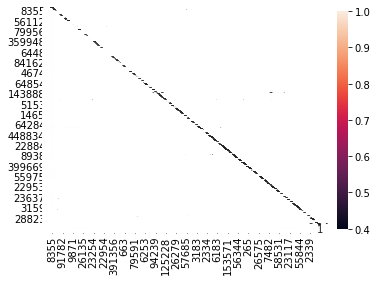

In [6]:
# Creating headmap for .4 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_4, annot=True)

In [7]:
plt.show()

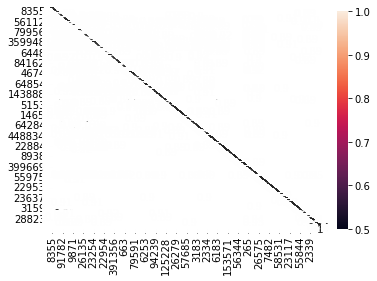

In [8]:
# Creating headmap for .5 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_5, annot=True)

In [9]:
plt.show()

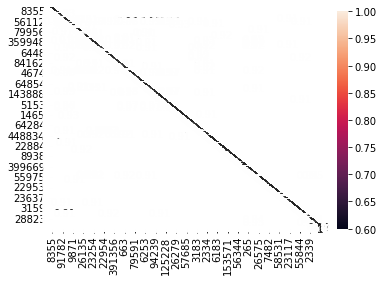

In [9]:
# Creating headmap for .6 thrushold
sns.heatmap(g_e_corr_full_read_round_2_strong_6, annot=True)

In [10]:
plt.show()

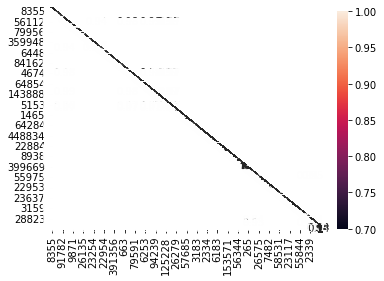

In [32]:
# Creating headmap for .7 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_7, annot=True)
plt.show()

In [ ]:
# Creating headmap for .8 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_8, annot=True)
plt.show()

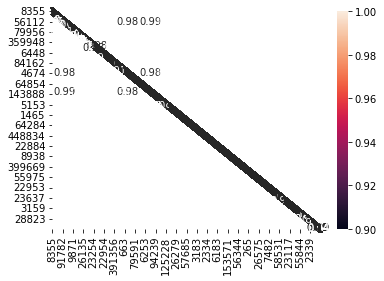

In [7]:
# Creating headmap for .9 thrushold

sns.heatmap(g_e_corr_full_read_round_2_strong_9, annot=True)
plt.show()

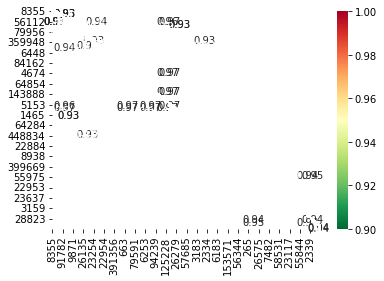

In [16]:
sns.heatmap(g_e_corr_full_read_round_2_strong_9, cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.show()

In [12]:
g_e_corr_full_read_round_2_strong_3_stack = g_e_corr_full_read_round_2_strong_3.stack().reset_index()
g_e_corr_full_read_round_2_strong_3_stack = g_e_corr_full_read_round_2_strong_3_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_3_stack['from'] = g_e_corr_full_read_round_2_strong_3_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_3_stack['to'] = g_e_corr_full_read_round_2_strong_3_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_3_stack[ (g_e_corr_full_read_round_2_strong_3_stack['from'] == g_e_corr_full_read_round_2_strong_3_stack['to'])].index
g_e_corr_full_read_round_2_strong_3_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_3_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_3_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_3_stack.head(10)

,from,to,weight
1,8355,8263,0.31
2,8355,474383,0.31
3,8355,474384,0.31
4,8355,54998,0.33
5,8355,279,0.30
6,8355,276,0.30
7,8355,277,0.30
8,8355,278,0.30
9,8355,22818,0.36
10,8355,83443,0.30


In [15]:
g_e_corr_full_read_round_2_strong_3_stack.shape

(15465168, 3)

In [14]:
g_e_corr_full_read_round_2_strong_4_stack = g_e_corr_full_read_round_2_strong_4.stack().reset_index()
g_e_corr_full_read_round_2_strong_4_stack = g_e_corr_full_read_round_2_strong_4_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_4_stack['from'] = g_e_corr_full_read_round_2_strong_4_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_4_stack['to'] = g_e_corr_full_read_round_2_strong_4_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_4_stack[ (g_e_corr_full_read_round_2_strong_4_stack['from'] == g_e_corr_full_read_round_2_strong_4_stack['to'])].index
g_e_corr_full_read_round_2_strong_4_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_4_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_4_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_4_stack.head(10)

,from,to,weight
2,126282,219957,0.43
3,126282,337974,0.51
4,126282,56144,0.40
5,126282,171392,0.45
6,126282,91353,0.45
7,126282,5455,0.46
8,126282,386675,0.52
9,126282,386685,0.52
10,126282,386677,0.46
11,126282,135941,0.41


In [16]:
g_e_corr_full_read_round_2_strong_4_stack.shape

(6597094, 3)

In [27]:
g_e_corr_full_read_round_2_strong_5_stack = g_e_corr_full_read_round_2_strong_5.stack().reset_index()
g_e_corr_full_read_round_2_strong_5_stack = g_e_corr_full_read_round_2_strong_5_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_5_stack['from'] = g_e_corr_full_read_round_2_strong_5_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_5_stack['to'] = g_e_corr_full_read_round_2_strong_5_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_5_stack[ (g_e_corr_full_read_round_2_strong_5_stack['from'] == g_e_corr_full_read_round_2_strong_5_stack['to'])].index
g_e_corr_full_read_round_2_strong_5_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_5_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_5_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_5_stack.head(10)

,from,to,weight
2,126282,337974,0.51
3,126282,386675,0.52
4,126282,386685,0.52
5,126282,22947,0.51
6,126282,26583,0.51
7,126282,653543,0.51
8,126282,653544,0.51
9,126282,653545,0.51
10,126282,653548,0.51
11,126282,55695,0.50


In [28]:
g_e_corr_full_read_round_2_strong_5_stack.shape

(2798216, 3)

In [29]:
g_e_corr_full_read_round_2_strong_6_stack = g_e_corr_full_read_round_2_strong_6.stack().reset_index()
g_e_corr_full_read_round_2_strong_6_stack = g_e_corr_full_read_round_2_strong_6_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_6_stack['from'] = g_e_corr_full_read_round_2_strong_6_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_6_stack['to'] = g_e_corr_full_read_round_2_strong_6_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_6_stack[ (g_e_corr_full_read_round_2_strong_6_stack['from'] == g_e_corr_full_read_round_2_strong_6_stack['to'])].index
g_e_corr_full_read_round_2_strong_6_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_6_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_6_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_6_stack.head(10)

,from,to,weight
2,126282,575,0.61
3,126282,3487,0.67
4,126282,51719,0.60
5,126282,256949,0.62
6,126282,729396,0.66
10,8263,474383,1.00
11,8263,474384,1.00
12,8263,23451,0.62
13,8263,2539,0.61
14,8263,1175,0.62


In [30]:
g_e_corr_full_read_round_2_strong_6_stack.shape

(1011744, 3)

In [14]:
g_e_corr_full_read_round_2_strong_7_stack = g_e_corr_full_read_round_2_strong_7.stack().reset_index()
g_e_corr_full_read_round_2_strong_7_stack = g_e_corr_full_read_round_2_strong_7_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_7_stack['from'] = g_e_corr_full_read_round_2_strong_7_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_7_stack['to'] = g_e_corr_full_read_round_2_strong_7_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_7_stack[ (g_e_corr_full_read_round_2_strong_7_stack['from'] == g_e_corr_full_read_round_2_strong_7_stack['to'])].index
g_e_corr_full_read_round_2_strong_7_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_7_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_7_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_7_stack.head(10)

,from,to,weight
5,8263,474383,1.0
6,8263,474384,1.0
7,474383,8263,1.0
9,474383,474384,1.0
10,474384,8263,1.0
11,474384,474383,1.0
16,93659,94115,1.0
17,93659,114335,1.0
18,93659,114336,1.0
19,94115,93659,1.0


In [15]:
g_e_corr_full_read_round_2_strong_7_stack.shape

(245678, 3)

In [9]:
g_e_corr_full_read_round_2_strong_8_stack = g_e_corr_full_read_round_2_strong_8.stack().reset_index()
g_e_corr_full_read_round_2_strong_8_stack = g_e_corr_full_read_round_2_strong_8_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_8_stack['from'] = g_e_corr_full_read_round_2_strong_8_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_8_stack['to'] = g_e_corr_full_read_round_2_strong_8_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_8_stack[ (g_e_corr_full_read_round_2_strong_8_stack['from'] == g_e_corr_full_read_round_2_strong_8_stack['to'])].index
g_e_corr_full_read_round_2_strong_8_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_8_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_8_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_8_stack.head(10)

,from,to,weight
5,8263,474383,1.0
6,8263,474384,1.0
7,474383,8263,1.0
9,474383,474384,1.0
10,474384,8263,1.0
11,474384,474383,1.0
16,93659,94115,1.0
17,93659,114335,1.0
18,93659,114336,1.0
19,94115,93659,1.0


In [10]:
g_e_corr_full_read_round_2_strong_8_stack.shape

(28598, 3)

In [5]:
g_e_corr_full_read_round_2_strong_9_stack = g_e_corr_full_read_round_2_strong_9.stack().reset_index()
g_e_corr_full_read_round_2_strong_9_stack = g_e_corr_full_read_round_2_strong_9_stack.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})
g_e_corr_full_read_round_2_strong_9_stack['from'] = g_e_corr_full_read_round_2_strong_9_stack['from'].astype(int)
g_e_corr_full_read_round_2_strong_9_stack['to'] = g_e_corr_full_read_round_2_strong_9_stack['to'].astype(int)
index_names = g_e_corr_full_read_round_2_strong_9_stack[ (g_e_corr_full_read_round_2_strong_9_stack['from'] == g_e_corr_full_read_round_2_strong_9_stack['to'])].index
g_e_corr_full_read_round_2_strong_9_stack.drop(index_names, inplace = True)
g_e_corr_full_read_round_2_strong_9_stack.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/ADNI_Gene_Expression_Profile/g_e_corr_full_read_round_2_strong_9_stack.csv',index = False)
g_e_corr_full_read_round_2_strong_9_stack.head(10)

,from,to,weight
5,8263,474383,1.0
6,8263,474384,1.0
7,474383,8263,1.0
9,474383,474384,1.0
10,474384,8263,1.0
11,474384,474383,1.0
16,93659,94115,1.0
17,93659,114335,1.0
18,93659,114336,1.0
19,94115,93659,1.0


In [6]:
g_e_corr_full_read_round_2_strong_9_stack.shape

(1706, 3)